<a href="https://colab.research.google.com/github/isra9731/TSF_Tasks/blob/main/TASK1_Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**SPARKS FOUNDATION INTERNSHIP GRIP JULY 2021** 

###**DATA SCIENCE AND BUSINESS ANALYTICS**

**AUTHOR : ISRA FARDEEN**

**Date : 03-07-2021**



##**LINEAR REGRESSION WITH PYTHON SCIKIT LEARN**

####**scikit-learn** - Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. This library can be used to implement regression functions. 

####In our project We will start with simple linear regression involving two variables.

###**SIMPLE LINEAR REGRESSION :**
####A Statistical method to find relationship between two continuous variables.


###***Prediction using Supervised ML***

####**Task**
####1.  Predict the percentage of an student based on the no. of study hours. 
####2. What will be predicted score if a student studies for 9.25 hrs/ day? 

#####**Dataset used:** http://bit.ly/w-data

In [ ]:
# importing libraries
import numpy as np                                               #for numerical calculations    
import pandas as pd                                              #for handling the dataset
import matplotlib.pyplot as plt                                  #for visualization
import seaborn as sns                                            #convert data to informative plots
from sklearn.model_selection import train_test_split             #splits data arrays into two subsets
from sklearn.linear_model import LinearRegression                #fits a linear model with coefficients
from sklearn.metrics import r2_score, mean_absolute_error        #computes subset accuracy using the metrics

###**Step 1: Gathering Data**

In [ ]:
url="http://bit.ly/w-data"
student_data=pd.read_csv(url)
student_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


retrieving the first 5 records from our dataset

In [ ]:
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


retrieving the last 5 records from our dataset

In [ ]:
student_data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


###**Step 2: Analyzing The Data**

In [ ]:
student_data.shape      #shape returns a tuple corresponding to the dimensions of an array

(25, 2)

From the above output we see that our dataset has 25 rows and 2 columns

checking for Null values

In [ ]:
student_data.info()                       #Summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


As we see there are no Null Values from the above output. So there is no need of dealing with missing values

In [ ]:
student_data.describe()            #statistical details of the dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Checking for outliers in the data using Boxplot

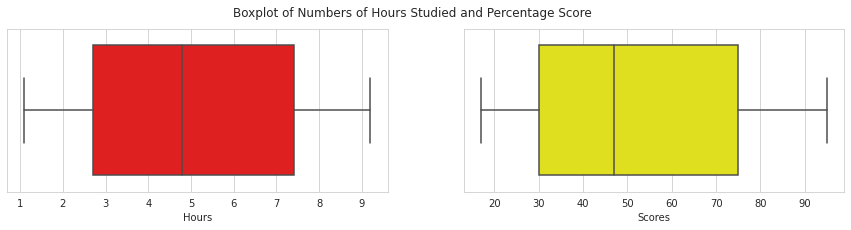

In [ ]:
fig, axes =plt.subplots(1,2,figsize= (15,3))
fig.suptitle("Boxplot of Numbers of Hours Studied and Percentage Score")
sns.set_style("whitegrid")
sns.boxplot(ax= axes[0], x= student_data['Hours'], color='red')
sns.boxplot(ax= axes[1], x= student_data['Scores'], color='yellow')
plt.show()

Hence from the above output it concludes that there are no outliers

**Correlation**

* -1 : where if one variable increases the other variable decreases. **(Perfect Negative Correlation)**
*  0:  The variables do not have any relationship with eachother. **(No Correlation)**
* 1: If one variable increases other variable increases too. **(Perfect Positive Correlation)**






In [ ]:
 student_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


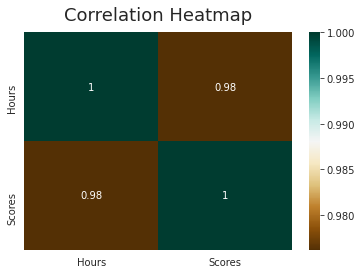

In [ ]:
correlation = student_data.corr()                                                                  #using heatmap to show correlations
heatmap=sns.heatmap(correlation, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

From the above outputs we notice that "Hours" and "Scores" got 0.976191 correlation which is a perfect positive correlation.

Now we will plot our data points on 2D-Graph where we will check if we can find the relationship between data manually.

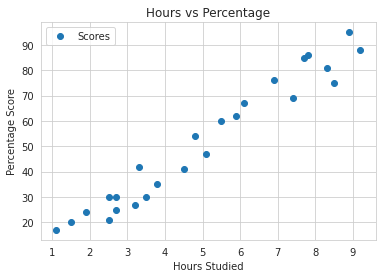

In [ ]:
student_data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In the above code we are using plot function of pandas dataframe where we are giving names to x coordinate - Hours and y coordinate - scores respectively.


In the above graph we notice that there is a positive linear relation between the number of hours studied and percentage of score as Hours Studied increases then Percentage Score also increases.

###**Step 3: Preparing Data For Model Creation**

We have to split our data into Attributes(Independent) and Labels(Dependent) We are predicting the percentage score depending upon the hours studied. Hence,our attribute set will consist of the "Hours" column, and the label will be the "Score" column. 

In [ ]:
x=student_data.iloc[:,:-1].values.reshape(-1,1)
y=student_data.iloc[:,1].values.reshape(-1,1)

Now we are splitting this data into train and test sets by using Scikit-Learn's built-in train_test_split() method

We are splitting 20% of original data to testing set and 80% of original data to training set

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)   #test_size specifies proportion of test set

In [ ]:
print("****Shape of Datasets****")
print("Train Set of X :", x_train.shape)
print("Train Set of Y :", y_train.shape)
print("Test Set of X :", x_test.shape)
print("Test Set of Y :", y_test.shape)

****Shape of Datasets****
Train Set of X : (20, 1)
Train Set of Y : (20, 1)
Test Set of X : (5, 1)
Test Set of Y : (5, 1)


###**Step 4: Model Creation**

In [ ]:
regressor=LinearRegression()              #simple linear regression
print("Model created")

Model created


In [ ]:
regressor.fit(x_train,y_train)
print("Training Completed")


Training Completed


###**Step 5: Training The Created Model**

linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data

Retrieving The Intercept

In [ ]:
print(regressor.intercept_)

[2.01816004]


Retrieving The Slope (Coefficient of x)

In [ ]:
print(regressor.coef_)

[[9.91065648]]


From the above output it means that if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously.

###**Step 6: Visualization Of Model**

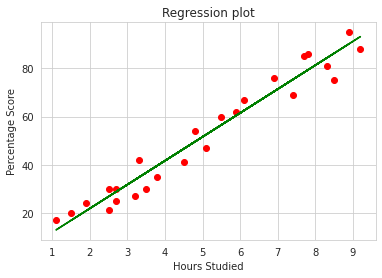

In [ ]:
# Plotting the regression line on Scatter Plot
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y , c="red")
plt.plot(x, line, color="green")
plt.title("Regression plot")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

###**Step 7: Predicting The Test Data**

In [ ]:
y_predicted = regressor.predict(x_test)                 #contains all the predicted values for the input values in the X_test series.
print(y_predicted)

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


Comparision of Actual Values vs Predicted Values

In [ ]:
df = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_predicted.ravel()})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


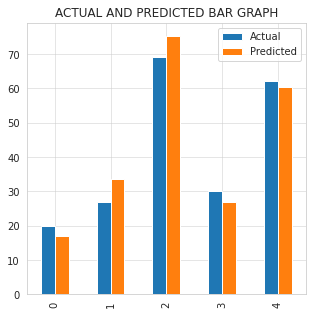

In [ ]:
#depicting the difference between the actual and predicted value

df.plot(kind='bar',figsize=(5,5))
plt.title("ACTUAL AND PREDICTED BAR GRAPH")
plt.grid(which='major', linewidth='0.5')
plt.grid(which='minor', linewidth='0.5')
plt.show()

From the above output we come to a conclusion that our model is not very precise, the predicted percentages are close to the actual ones.

###**Step 8: Model Evaluation**

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predicted)) 

Mean Absolute Error: 4.183859899002982


In [ ]:
print('R2_Score:', r2_score(y_test, y_predicted))

R2_Score: 0.9454906892105354


From the outputs of model evaluation we observed that from **r2_score we have  0.9454906892105354 which means we have 94% accuracy.**
**Mean Absolute error having 4.183859899002982 which means we are having minimal error**


##**Our Final Prediction**

In [ ]:
#Testing with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [93.69173249]


In [ ]:
percentage=np.round(own_pred, decimals=1)
print("Percentage = {}".format(percentage))

Percentage = [[93.7]]


**Hence this Simple Linear Regression Model predicts that if a Student Studies for 9.25 hours than he will Score 93.69%**